# Time Series from Wide Form Data Core

## Part 1
- First, you will prepare the dataset for time series analysis:
- Load in the Zillow Home Value Index dataframe.
- Filter the 4 largest cities into a new dataframe.
 - Therefore the 4 largest cities would have rank values of [0,1,2,3]
- Melt the data to long-form and prepare it for time series analysis.
- Convert the melted dates into datetime datatype.
- Make the datetime column the index.
- Resample the dataframe as monthly frequency, grouped by City.

## Imports and Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

In [3]:
filename = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df = pd.read_csv(filename)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


## Filter the 4 largest cities into a new dataframe

In [6]:
df1 = df.copy()

In [7]:
# top 4 city filter
largecity = (df1['SizeRank'] >= 0) & (df1['SizeRank'] <=3)

In [9]:
# apply filter
df1[largecity]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [10]:
# create new dataframe
df1 = df1[largecity]

In [11]:
# column names
df1.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

## Melt the data to long-form and prepare it for time series analysis.

In [12]:
melted = pd.melt(df1.drop(columns=['RegionID','StateName']),
                id_vars=['SizeRank', 'RegionName','RegionType','State','Metro','CountyName'],
                value_name='Home Value',var_name="Date")
melted

,SizeRank,RegionName,RegionType,State,Metro,CountyName,Date,Home Value
0,0,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,1,Los Angeles,city,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,2,Houston,city,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,3,Chicago,city,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,0,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...
1087,3,Chicago,city,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,0,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,1,Los Angeles,city,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,2,Houston,city,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


### Convert the melted dates into datetime datatype.

In [14]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SizeRank    1092 non-null   int64         
 1   RegionName  1092 non-null   object        
 2   RegionType  1092 non-null   object        
 3   State       1092 non-null   object        
 4   Metro       1092 non-null   object        
 5   CountyName  1092 non-null   object        
 6   Date        1092 non-null   datetime64[ns]
 7   Home Value  1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 68.4+ KB


### Make the datetime column the index.

In [15]:
melted = melted.set_index("Date")
melted

,SizeRank,RegionName,RegionType,State,Metro,CountyName,Home Value
Date,,,,,,,
2000-01-31,0,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,1,Los Angeles,city,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,2,Houston,city,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,3,Chicago,city,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,0,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...
2022-08-31,3,Chicago,city,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,0,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,1,Los Angeles,city,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [16]:
df_ts = melted.groupby('RegionName').resample('M').sum()
df_ts

C:\Users\Evan\AppData\Local\Temp\ipykernel_46272\3932102839.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample('M').sum()
C:\Users\Evan\AppData\Local\Temp\ipykernel_46272\3932102839.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample('M').sum()
C:\Users\Evan\AppData\Local\Temp\ipykernel_46272\3932102839.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be 

SizeRank  Home Value
RegionName Date                            
Chicago    2000-01-31         3    166139.0
           2000-02-29         3    166536.0
           2000-03-31         3    167368.0
           2000-04-30         3    168826.0
           2000-05-31         3    170499.0
...                         ...         ...
New York   2022-05-31         0    768797.0
           2022-06-30         0    773944.0
           2022-07-31         0    777692.0
           2022-08-31         0    779960.0
           2022-09-30         0    781622.0

[1092 rows x 2 columns]

## Part 2
Once you've prepared the dataframe with the time series data for the 4 largest cities:
- Plot the home values for all 4 cities. (Hint: use unstack)
- Make sure to add a title and axis labels.
 - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
 - Hint: use the FuncFormatter from matplotlib.
- Answer the following 2 questions using pandas:
- 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
 - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 
- 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
 - Hint: you can use .diff() to calculate the change in values

## Plot the home values for all 4 cities. (Hint: use unstack)

### Custom Functions

In [20]:
# Func to convert thousands into K
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

# Create the formatter
fmt_thous = mticks.FuncFormatter(thousands)

In [18]:
unstacked = df_ts.unstack(level=0)
unstacked

SizeRank                              Home Value            \
RegionName  Chicago Houston Los Angeles New York    Chicago   Houston   
Date                                                                    
2000-01-31        3       2           1        0   166139.0  109068.0   
2000-02-29        3       2           1        0   166536.0  109079.0   
2000-03-31        3       2           1        0   167368.0  108878.0   
2000-04-30        3       2           1        0   168826.0  108881.0   
2000-05-31        3       2           1        0   170499.0  108834.0   
...             ...     ...         ...      ...        ...       ...   
2022-05-31        3       2           1        0   312487.0  265558.0   
2022-06-30        3       2           1        0   314663.0  268901.0   
2022-07-31        3       2           1        0   315910.0  271059.0   
2022-08-31        3       2           1        0   315587.0  272400.0   
2022-09-30        3       2           1        0   315429.0  272639.0   

                                  
RegionName Los Angeles  New York  
Date                              
2000-01-31    234181.0  253690.0  
2000-02-29    234401.0  255517.0  
2000-03-31    235513.0  257207.0  
2000-04-30    237589.0  260310.0  
2000-05-31    240113.0  263204.0  
...                ...       ...  
2022-05-31    990391.0  768797.0  
2022-06-30    992337.0  773944.0  
2022-07-31    992630.0  777692.0  
2022-08-31    978196.0  779960.0  
2022-09-30    966595.0  781622.0  

[273 rows x 8 columns]

In [26]:
unstacked.drop('SizeRank', axis=1, inplace=True)

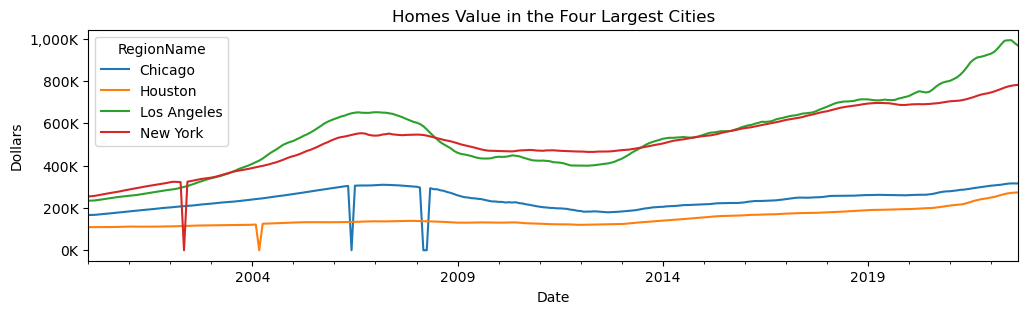

In [27]:
# plot unstacked Home value
ax = unstacked['Home Value'].plot(figsize=(12,3))
# y axis as thousands
ax.yaxis.set_major_formatter(fmt_thous)
ax.set_title('Homes Value in the Four Largest Cities')
ax.set_xlabel('Date')
ax.set_ylabel('Dollars');

## 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [28]:
unstacked.head()

Home Value                                
RegionName    Chicago   Houston Los Angeles  New York
Date                                                 
2000-01-31   166139.0  109068.0    234181.0  253690.0
2000-02-29   166536.0  109079.0    234401.0  255517.0
2000-03-31   167368.0  108878.0    235513.0  257207.0
2000-04-30   168826.0  108881.0    237589.0  260310.0
2000-05-31   170499.0  108834.0    240113.0  263204.0

In [30]:
# get min value using idxmin
min = unstacked.idxmin()
# set at at 2008 value is at [1]
ind_2008 = unstacked.loc['2008-12'].idxmax()[1]
# display
unstacked.loc[ind_2008]

            RegionName 
Home Value  Chicago        265306.0
            Houston        131283.0
            Los Angeles    469294.0
            New York       510309.0
Name: 2008-12-31 00:00:00, dtype: float64

- New York had the highest typical home value and Houston had the lowest typical home value at the end of 2008

## 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [32]:
# use .diff to get the change in values from 11/2008 to 12/2008
nov_dec_diff = unstacked.loc['2008-11': '2008-12'].diff().dropna()
nov_dec_diff

Home Value                             
RegionName    Chicago Houston Los Angeles New York
Date                                              
2008-12-31    -5753.0  -964.0    -12611.0  -4458.0

The difference in home values from 11/2008 to 12/2008 is:
- Chicago: -5753
- Houston: -964
- Los Angeles: -12611
- New York: -4458